In [1]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 7.0 MB/s eta 0:00:00


In [26]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [27]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


In [1]:
from datasets import load_dataset

In [7]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.7
    Uninstalling dill-0.3.7:
      Successfully uninstalled dill-0.3.7


In [2]:
emotion_dataset = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train = emotion_dataset['train']
val = emotion_dataset['validation']
test = emotion_dataset['test']

In [6]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets,labels

In [7]:
tweets,labels = get_tweet(train)

In [8]:
tweets[0], labels[0]

('i didnt feel humiliated', 0)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [12]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [14]:
import matplotlib.pyplot as plt


Padding and Truncating as we need all of our inputs to be of the same shape

<function matplotlib.pyplot.show(close=None, block=None)>

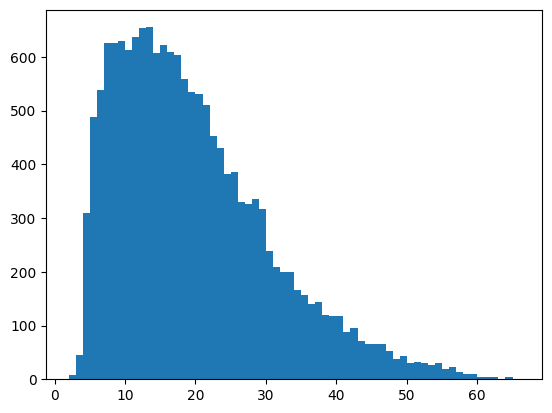

In [15]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths,bins = len(set(lengths)))
plt.show

In [16]:
max_len = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
def get_sequences(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences,truncating='post',padding='post',maxlen=max_len)
  return padded

In [20]:
padded_train_seq = get_sequences(tokenizer,tweets)

In [23]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [28]:
classes = set(labels)

In [29]:
print(classes)

{0, 1, 2, 3, 4, 5}


(array([4666.,    0., 5362.,    0., 1304.,    0., 2159.,    0., 1937.,
         572.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

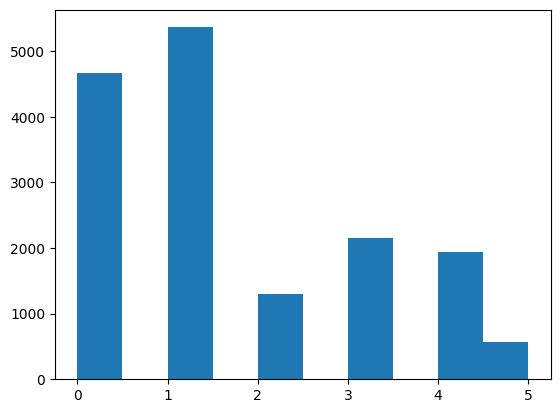

In [30]:
plt.hist(labels)

In [31]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [32]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [33]:
labels[0]

0

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length = max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation = 'softmax')
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [37]:
val_tweets,val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer,val_tweets)

In [42]:
padded_train_seq = np.array(padded_train_seq)
labels = np.array(labels)
val_seq = np.array(val_seq)
val_labels = np.array(val_labels)
h = model.fit(
    padded_train_seq,labels,validation_data = (val_seq,val_labels),epochs=20,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
)

Epoch 1/20
500/500 [==============================] - 51s 83ms/step - loss: 1.3081 - accuracy: 0.4827 - val_loss: 0.8317 - val_accuracy: 0.6765
Epoch 2/20
500/500 [==============================] - 41s 82ms/step - loss: 0.5879 - accuracy: 0.7799 - val_loss: 0.6274 - val_accuracy: 0.7930
Epoch 3/20
500/500 [==============================] - 37s 74ms/step - loss: 0.3276 - accuracy: 0.8911 - val_loss: 0.4815 - val_accuracy: 0.8470
Epoch 4/20
500/500 [==============================] - 38s 77ms/step - loss: 0.2253 - accuracy: 0.9289 - val_loss: 0.4238 - val_accuracy: 0.8650
Epoch 5/20
500/500 [==============================] - 41s 83ms/step - loss: 0.1671 - accuracy: 0.9475 - val_loss: 0.4342 - val_accuracy: 0.8700
Epoch 6/20
500/500 [==============================] - 35s 71ms/step - loss: 0.1247 - accuracy: 0.9591 - val_loss: 0.3908 - val_accuracy: 0.8920
Epoch 7/20
500/500 [==============================] - 39s 77ms/step - loss: 0.0944 - accuracy: 0.9699 - val_loss: 0.3785 - val_accuracy:

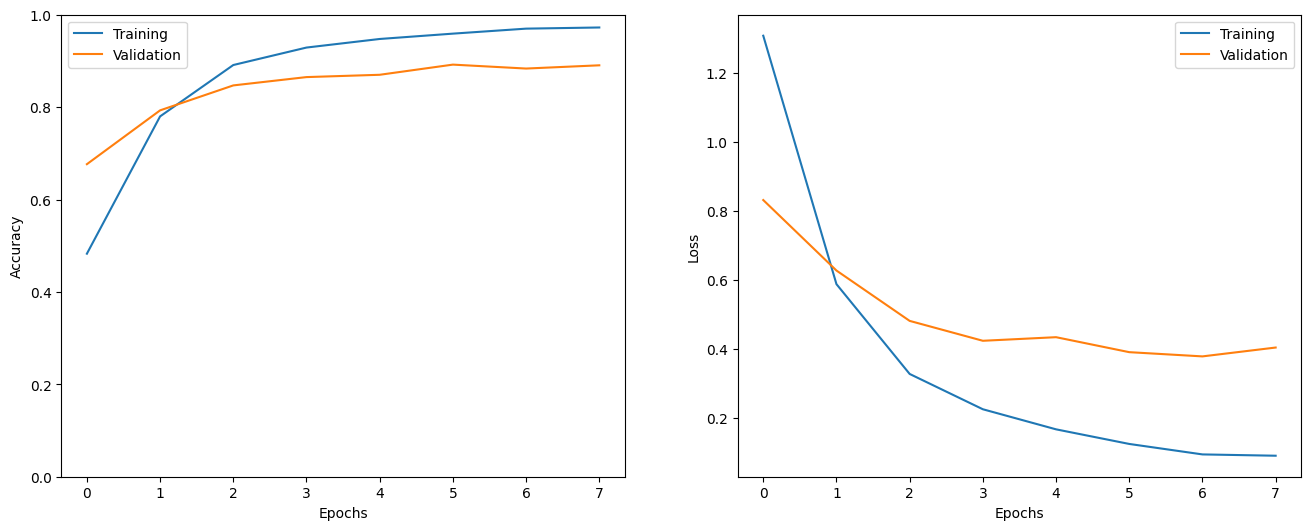

In [43]:
show_history(h)

In [44]:
test_tweets,test_labels= get_tweet(test)
test_seq = get_sequences(tokenizer,test_tweets)


In [46]:
test_tweets =np.array(test_tweets)
test_labels = np.array(test_labels)

In [47]:
_=model.evaluate(test_seq,test_labels)

63/63 [==============================] - 2s 34ms/step - loss: 0.3963 - accuracy: 0.8915


In [51]:
preds = (model.predict(test_seq) > 0.5).astype("int32")

63/63 [==============================] - 4s 60ms/step
